In [25]:
import jax
import jax.random as jr
import matplotlib.pyplot as plt
from baryx import recombine

# Required for good results with the default solvers.
jax.config.update("jax_enable_x64", True)

# Nodes and weights define a discrete measure $\mu$.
n, m = 256, 2
key = jr.key(0)
nodes_key, weights_key = jr.split(key)
nodes = jr.normal(nodes_key, (n, m))
weights = jr.uniform(weights_key, (n,))


# Test functions $f$ used to define the push-forward $f_{\#}\mu$.
def f(x):
    return x


# Apply the test functions $f$ to yield the push-forward $f_{\#}\mu$.
pushed_forward_nodes = f(nodes)

# Solve the recombination problem for the push-forward $f_{\#}{\mu}$.
solution = recombine(pushed_forward_nodes, weights)
err = solution.error(norm=2)
print(err)

# Construct the recombined measure $\hat{\mu}$.
recombined_nodes = nodes[solution.indices]
recombined_weights = solution.weights

Error(absolute=Array(2.96997629e-16, dtype=float64), relative=Array(2.7608019e-15, dtype=float64), norm=2)


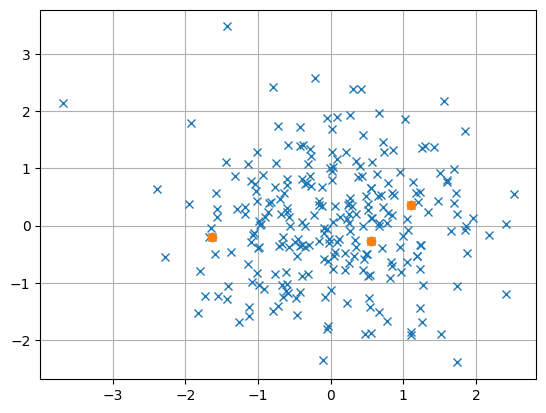

In [29]:
plt.plot(nodes[:, 0], nodes[:, 1], "x", label="Original")
plt.plot(recombined_nodes[:, 0], recombined_nodes[:, 1], "o", label="Recombined")
plt.grid()
plt.show()